In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

In [2]:
url="https://covid19.isciii.es/resources/serie_historica_acumulados.csv"
t=requests.get(url).text
s=t.split("NOTA")[0]

In [3]:
#df=pd.read_csv('serie_historica_acumulados.csv', parse_dates=True)

In [42]:
df=pd.read_csv(io.StringIO(s), parse_dates=True)

In [44]:
df.fillna(0, inplace=True)

In [46]:
df['FECHA'] = pd.to_datetime(df['FECHA'],dayfirst=True)

In [48]:
df

,CCAA,FECHA,CASOS,Hospitalizados,UCI,Fallecidos,Recuperados
0,AN,2020-02-20,0.0,0.0,0.0,0.0,0.0
1,AR,2020-02-20,0.0,0.0,0.0,0.0,0.0
2,AS,2020-02-20,0.0,0.0,0.0,0.0,0.0
3,IB,2020-02-20,1.0,0.0,0.0,0.0,0.0
4,CN,2020-02-20,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
983,ML,2020-04-11,98.0,43.0,3.0,2.0,18.0
984,MC,2020-04-11,1449.0,537.0,91.0,97.0,344.0
985,NC,2020-04-11,3969.0,1663.0,124.0,232.0,650.0
986,PV,2020-04-11,10772.0,5547.0,459.0,804.0,4867.0


In [49]:
df = df.groupby('FECHA')['CASOS'].sum().to_frame()

In [51]:
df=df.sort_values(by='CASOS')

In [53]:
df['Index'] = range(1, len(df) + 1)

In [55]:
df=df.set_index('Index')

In [57]:
df['Dif. casos'] = df['CASOS'] - df['CASOS'].shift(1)

In [59]:
df.fillna(0, inplace=True)

In [60]:
df.drop('CASOS', axis=1, inplace=True)

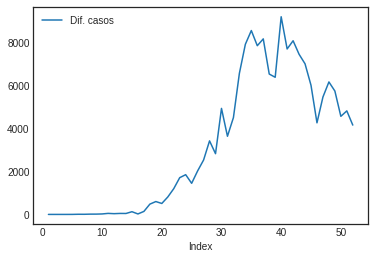

In [62]:
df.plot()

In [63]:
yData=df[df['Dif. casos']>0].to_numpy()
yData=yData.reshape(yData.size)
xData=np.arange(yData.size)

In [64]:
yData

array([1.000e+00, 7.000e+00, 6.000e+00, 1.300e+01, 1.400e+01, 2.200e+01,
       4.800e+01, 3.500e+01, 4.600e+01, 4.400e+01, 1.260e+02, 2.200e+01,
       1.400e+02, 4.800e+02, 6.000e+02, 5.110e+02, 8.120e+02, 1.201e+03,
       1.714e+03, 1.854e+03, 1.451e+03, 2.029e+03, 2.538e+03, 3.431e+03,
       2.833e+03, 4.946e+03, 3.646e+03, 4.517e+03, 6.584e+03, 7.937e+03,
       8.578e+03, 7.871e+03, 8.189e+03, 6.549e+03, 6.398e+03, 9.222e+03,
       7.719e+03, 8.102e+03, 7.472e+03, 7.026e+03, 6.023e+03, 4.273e+03,
       5.478e+03, 6.180e+03, 5.756e+03, 4.576e+03, 4.830e+03, 4.167e+03])

In [65]:
#Example of regression function - Polynomial
#def func(x, a ,b, c, d):
#    return a*np.exp(b*x)
#    return a+ b*x + c*pow(x,2)+ d*pow(x,3) #+ e*pow(x,4) + f*pow(x,5) + g*pow(x,6)

In [66]:
#Example of regression function
#def func(x, amp, cen, wid):
#    return amp * np.exp(-(x-cen)**2 / wid)

In [67]:
#Regression function - skew normal
def func(x, sigmag, mu, alpha,a):
    c = 0
    #normal distribution
    normpdf = (1/(sigmag*np.sqrt(2*np.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))
    normcdf = (0.5*(1+erf((alpha*((x-mu)/sigmag))/(np.sqrt(2)))))
    return 2*a*normpdf*normcdf + c

In [68]:
popt, pcov = curve_fit(func, xData, yData, p0=(1,1,1,20000))
print(popt)
print(pcov)

[1.55520982e+01 2.59217710e+01 2.39380852e+00 1.96568647e+05]
[[ 3.98948873e+00 -1.70589201e+00  1.27276376e+00  1.75076779e+04]
 [-1.70589201e+00  8.49489148e-01 -5.77436836e-01 -6.96616543e+03]
 [ 1.27276376e+00 -5.77436836e-01  4.65229883e-01  4.92068079e+03]
 [ 1.75076779e+04 -6.96616543e+03  4.92068079e+03  1.03671561e+08]]


In [69]:
xFit = np.arange(0.0, yData.size + 10, 1)

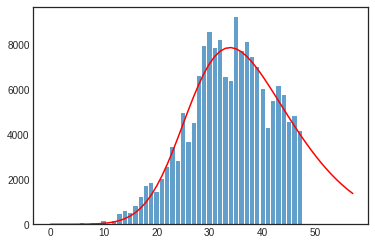

In [70]:
plt.style.use('seaborn-white')
plt.bar(xData, yData, align='center', alpha=0.7)
plt.plot(xFit, func(xFit, *popt), 'r')
plt.show()

In [71]:
#Prediction for the next day:
int(func(yData.size, *popt))

3680.3605783574817